In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Fri Dec 11 22:54:59 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    38W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#Importing Modules
import numpy as np
import pandas as pd
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from PIL import Image, ImageChops
import glob
import matplotlib.image as mpimg
import tensorflow as tf


In [3]:
print("Version: ", tf.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Version:  2.3.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [4]:
#Reading the data from dataset
df_training = pd.DataFrame(columns=['image_name', 'image_path', 'label'])


In [5]:
train_positive_img_path = '/content/drive/MyDrive/Crack Image Classification/Training/Positive/'
train_negative_img_path = '/content/drive/MyDrive/Crack Image Classification/Training/Negative/'

train_positive_imgs = os.listdir(train_positive_img_path)
train_negative_imgs = os.listdir(train_negative_img_path)


In [6]:
count_value = 0

for img_name in train_positive_imgs:
    df_training.loc[count_value, ['image_name']] = img_name
    df_training.loc[count_value, ['image_path']] = train_positive_img_path + img_name
    df_training.loc[count_value, ['label']] = 'Positive'
    
    
    count_value += 1
    
    
for img_name in train_negative_imgs:
    df_training.loc[count_value, ['image_name']] = img_name
    df_training.loc[count_value, ['image_path']] = train_negative_img_path + img_name
    df_training.loc[count_value, ['label']] = 'Negative'
    
  
    count_value += 1
    

In [7]:
df_training.head()

,image_name,image_path,label
0,01704.jpg,/content/drive/MyDrive/Crack Image Classificat...,Positive
1,03770.jpg,/content/drive/MyDrive/Crack Image Classificat...,Positive
2,02289.jpg,/content/drive/MyDrive/Crack Image Classificat...,Positive
3,00531.jpg,/content/drive/MyDrive/Crack Image Classificat...,Positive
4,02616.jpg,/content/drive/MyDrive/Crack Image Classificat...,Positive


In [8]:
df_training.tail()

,image_name,image_path,label
7995,03593.jpg,/content/drive/MyDrive/Crack Image Classificat...,Negative
7996,01035.jpg,/content/drive/MyDrive/Crack Image Classificat...,Negative
7997,00925.jpg,/content/drive/MyDrive/Crack Image Classificat...,Negative
7998,02172.jpg,/content/drive/MyDrive/Crack Image Classificat...,Negative
7999,00281.jpg,/content/drive/MyDrive/Crack Image Classificat...,Negative


In [9]:
df_testing = pd.DataFrame(columns=['image_name', 'image_path', 'label'])


In [10]:
test_positive_img_path = '/content/drive/MyDrive/Crack Image Classification/Testing/Positive/'
test_negative_img_path = '/content/drive/MyDrive/Crack Image Classification/Testing/Negative/'

test_positive_imgs = os.listdir(test_positive_img_path)
test_negative_imgs = os.listdir(test_negative_img_path)


In [11]:
count_value = 0

for img_name in test_positive_imgs:
    df_testing.loc[count_value, ['image_name']] = img_name
    df_testing.loc[count_value, ['image_path']] = test_positive_img_path + img_name
    df_testing.loc[count_value, ['label']] = 'Positive'
    
    count_value += 1
    
    
for img_name in test_negative_imgs:
    df_testing.loc[count_value, ['image_name']] = img_name
    df_testing.loc[count_value, ['image_path']] = test_negative_img_path + img_name
    df_testing.loc[count_value, ['label']] = 'Negative'
    
    count_value += 1


In [12]:
df_testing.head()

,image_name,image_path,label
0,04457.jpg,/content/drive/MyDrive/Crack Image Classificat...,Positive
1,05515.jpg,/content/drive/MyDrive/Crack Image Classificat...,Positive
2,05147.jpg,/content/drive/MyDrive/Crack Image Classificat...,Positive
3,05022.jpg,/content/drive/MyDrive/Crack Image Classificat...,Positive
4,04286.jpg,/content/drive/MyDrive/Crack Image Classificat...,Positive


In [13]:
df_testing.tail()

,image_name,image_path,label
3995,05532.jpg,/content/drive/MyDrive/Crack Image Classificat...,Negative
3996,05796.jpg,/content/drive/MyDrive/Crack Image Classificat...,Negative
3997,04159.jpg,/content/drive/MyDrive/Crack Image Classificat...,Negative
3998,05403.jpg,/content/drive/MyDrive/Crack Image Classificat...,Negative
3999,04419.jpg,/content/drive/MyDrive/Crack Image Classificat...,Negative


In [14]:
x_test = df_testing['image_path']
y_test = df_testing['label']

In [15]:
from tensorflow import keras
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from sklearn.model_selection import train_test_split
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input

In [16]:
x_train, x_val, y_train, y_val = train_test_split(df_training["image_path"], df_training["label"], test_size = 0.25, 
                                                  stratify = df_training["label"])


df_train = pd.DataFrame({"image_path":x_train, "label":y_train})
df_val = pd.DataFrame({"image_path":x_val, "label":y_val})
df_test = pd.DataFrame({"image_path":x_test, "label":y_test})

df_train["image_path"] = df_train["image_path"].astype('str')   
df_val["image_path"] = df_val["image_path"].astype('str')
df_test["image_path"] = df_test["image_path"].astype('str')

df_train["label"] = df_train["label"].astype('str')   # requires target in string format
df_val["label"] = df_val["label"].astype('str')
df_test["label"] = df_test["label"].astype('str')

In [17]:
print(df_train.shape) 
print(df_val.shape)
print(df_test.shape)

(6000, 2)
(2000, 2)
(4000, 2)


In [18]:
# ImageDataGenerator
train_datagen = ImageDataGenerator(
        rotation_range=10,              # rotation
        width_shift_range=0.2,          # horizontal shift
        height_shift_range=0.2,         # vertical shift
        zoom_range=0.2,                 # zoom
        horizontal_flip=True,           # horizontal flip
        brightness_range=[0.2,1.2]     # brightness
        
) 

val_datagen=ImageDataGenerator()

test_datagen=ImageDataGenerator()

Found 6000 validated image filenames belonging to 2 classes.


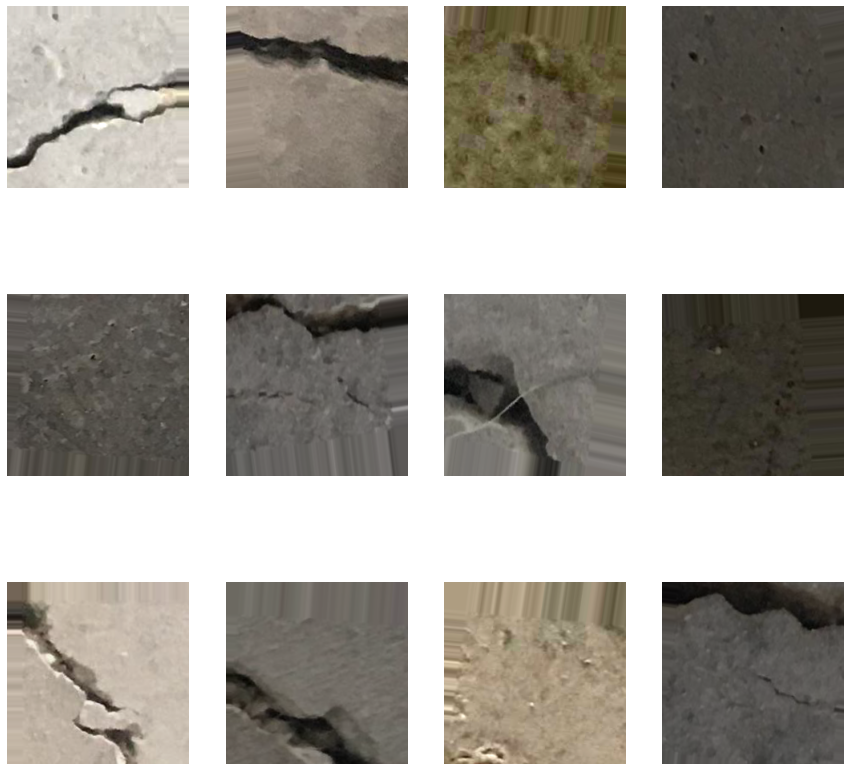

In [19]:

train_generator=train_datagen.flow_from_dataframe( dataframe=df_train, directory="/content/drive/MyDrive/Crack Image Classification/Training/", 
                                            x_col="image_path", y_col="label", 
                                            batch_size=32, seed=42, shuffle=True, class_mode="categorical",
                                            target_size=(227,227))


# plotting images
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15,15))

for i in range(12):

  # convert to unsigned integers for plotting
    image = next(train_generator)[0][0].astype('uint8')

  # changing size from (1, 227, 227, 3) to (227, 227, 3) for plotting the image
    image = np.squeeze(image)
    ax=ax.ravel()
  # plot raw pixel data
    ax[i].imshow(image)
    ax[i].axis('off')
plt.show()



In [20]:
val_generator=val_datagen.flow_from_dataframe( dataframe=df_val, directory="/content/drive/MyDrive/Crack Image Classification/Training/", 
                                            x_col="image_path", y_col="label", 
                                            batch_size=32, seed=42, shuffle=True, class_mode="categorical",
                                            target_size=(227,227))

test_generator=test_datagen.flow_from_dataframe( dataframe=df_test, directory="/content/drive/MyDrive/Crack Image Classification/Testing/", x_col="image_path", y_col='label', batch_size=32,
                                                seed=42, shuffle=False, class_mode='categorical', target_size=(227,227))

Found 2000 validated image filenames belonging to 2 classes.
Found 4000 validated image filenames belonging to 2 classes.


In [21]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)

Image batch shape:  (32, 227, 227, 3)
Label batch shape:  (32, 2)


In [22]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Negative' 'Positive']


In [23]:
model = Sequential()

model.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

In [24]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='sigmoid'))


In [25]:
model.layers[0].trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 24,112,770
Trainable params: 525,058
Non-trainable params: 23,587,712
_________________________________________________________________


In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(val_generator.samples/val_generator.batch_size)
print(steps_per_epoch)
print(val_steps_per_epoch)

188.0
63.0


In [28]:
# model training
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

fit = model.fit( train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_steps_per_epoch,
    verbose=1,
    callbacks=[tensorboard_callback] )

Epoch 1/20
  1/188 [..............................] - ETA: 0s - loss: 0.8012 - accuracy: 0.4688WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
188/188 [==============================] - 96s 511ms/step - loss: 0.0666 - accuracy: 0.9792 - val_loss: 0.0986 - val_accuracy: 0.9790
Epoch 2/20
188/188 [==============================] - 96s 510ms/step - loss: 0.0303 - accuracy: 0.9907 - val_loss: 0.1584 - val_accuracy: 0.9335
Epoch 3/20
188/188 [==============================] - 95s 506ms/step - loss: 0.0212 - accuracy: 0.9928 - val_loss: 0.0184 - val_accuracy: 0.9960
Epoch 4/20
188/188 [==============================] - 95s 506ms/step - loss: 0.0254 - accuracy: 0.9915 - val_loss: 0.2799 - val_accuracy: 0.8525
Epoch 5/20
188/188 [==============================] - 95s 

In [29]:
hist=fit.history

In [30]:
#Accuracy and loss after training

final_loss, final_accuracy = model.evaluate(val_generator, steps = val_steps_per_epoch)

63/63 [==============================] - 6s 93ms/step - loss: 0.0190 - accuracy: 0.9945


In [31]:
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

Final loss: 0.02
Final accuracy: 99.45%


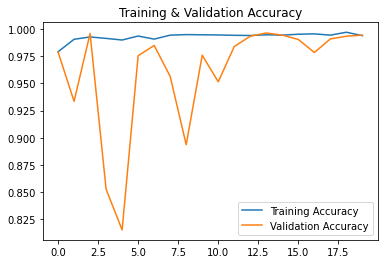

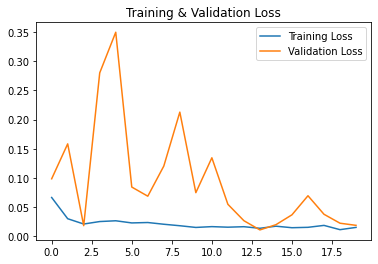

In [32]:
# Visualize training process

accuracy=hist['accuracy']
val_accuracy=hist['val_accuracy']
loss=hist['loss']
val_loss=hist['val_loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,label='Training Accuracy')
plt.plot(epochs,val_accuracy,label='Validation Accuracy')
plt.title("Training & Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.title("Training & Validation Loss")
plt.legend()
plt.show()

In [33]:
Crack_model = "saved_models/crack_classification.h5"
model.save(Crack_model)

In [34]:
# Images and labels batch from test generator

test_image_batch, test_label_batch = next(iter(test_generator))
true_label_ids = np.argmax(test_label_batch, axis=-1)

print("Test batch shape:", test_image_batch.shape)

Test batch shape: (32, 227, 227, 3)


In [35]:
prediction = model.predict(test_image_batch)
print("Prediction results shape:", prediction.shape)

Prediction results shape: (32, 2)


In [36]:
# Converting prediction results to Pandas dataframe, for better visualization

pred_dataframe = pd.DataFrame(prediction)
pred_dataframe.columns = dataset_labels

print("Prediction results for the first elements")
pred_dataframe.head()

Prediction results for the first elements


,Negative,Positive
0,2.411260e-08,0.999952
1,3.124455e-05,0.996930
2,6.957737e-10,1.000000
3,2.468498e-08,0.999920
4,3.102001e-08,0.999994


In [37]:
predicted_ids = np.argmax(prediction, axis=-1)
predicted_labels = dataset_labels[predicted_ids]

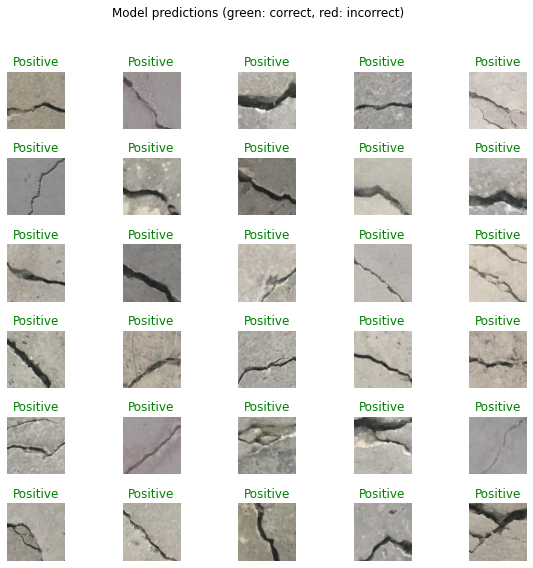

In [38]:
# Printing images batch and labels predictions

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(test_image_batch[n].astype('uint8'))
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [39]:
predictions = model.predict(test_generator, steps = np.ceil(test_generator.samples / test_generator.batch_size), verbose=1, workers=0)

125/125 [==============================] - 17s 138ms/step


In [40]:
predicted_ids = np.argmax(predictions, axis=-1)

true_label_ids = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


In [41]:
from sklearn import metrics
print('Confusion Matrix')
cm = metrics.confusion_matrix(true_label_ids, predicted_ids)
print(cm)
print('Classification Report')
print(metrics.classification_report(true_label_ids, predicted_ids,target_names=class_labels))

Confusion Matrix
[[1980   20]
 [   2 1998]]
Classification Report
              precision    recall  f1-score   support

    Negative       1.00      0.99      0.99      2000
    Positive       0.99      1.00      0.99      2000

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000

